# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import datasets

In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [ ]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


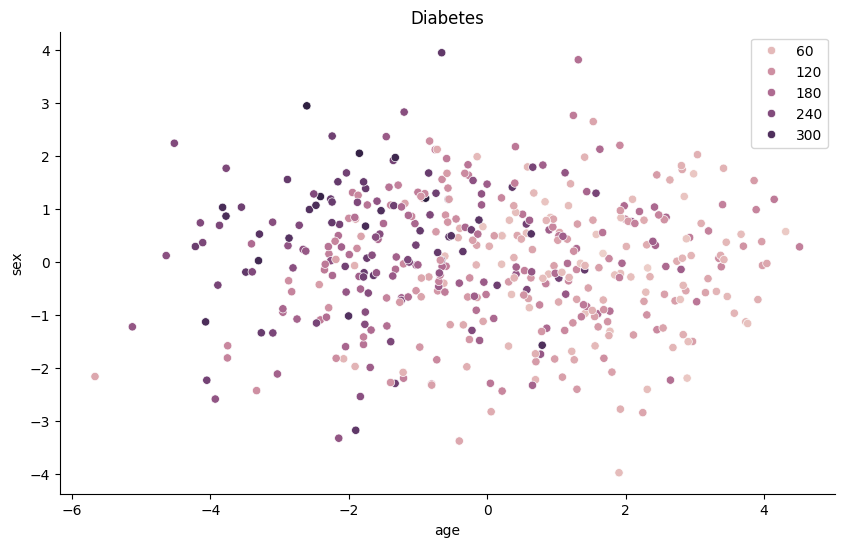

In [ ]:
pca.dibujar("Diabetes", diabetes.feature_names[0:2], target, datos_pca)

##**Taller # 1**

* Utilizar dataset blue jays
* Realizar analisis bivariado todos contra todos tal como se explicó
* Interpretar resultados del analisis bivariado
* Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
* Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

##**Desarrollo de la actividad**

In [ ]:
# Cargar el archivo CSV
data = pd.read_csv('blue_jays.csv')

# Filtrar solo las columnas numéricas y se dejan listo para usar los datos mas adelante las veces que sea necesarias
data_numeric = data.select_dtypes(include=[np.number])

**Se realizaran las graficas para realizar el analisis bivariado.**

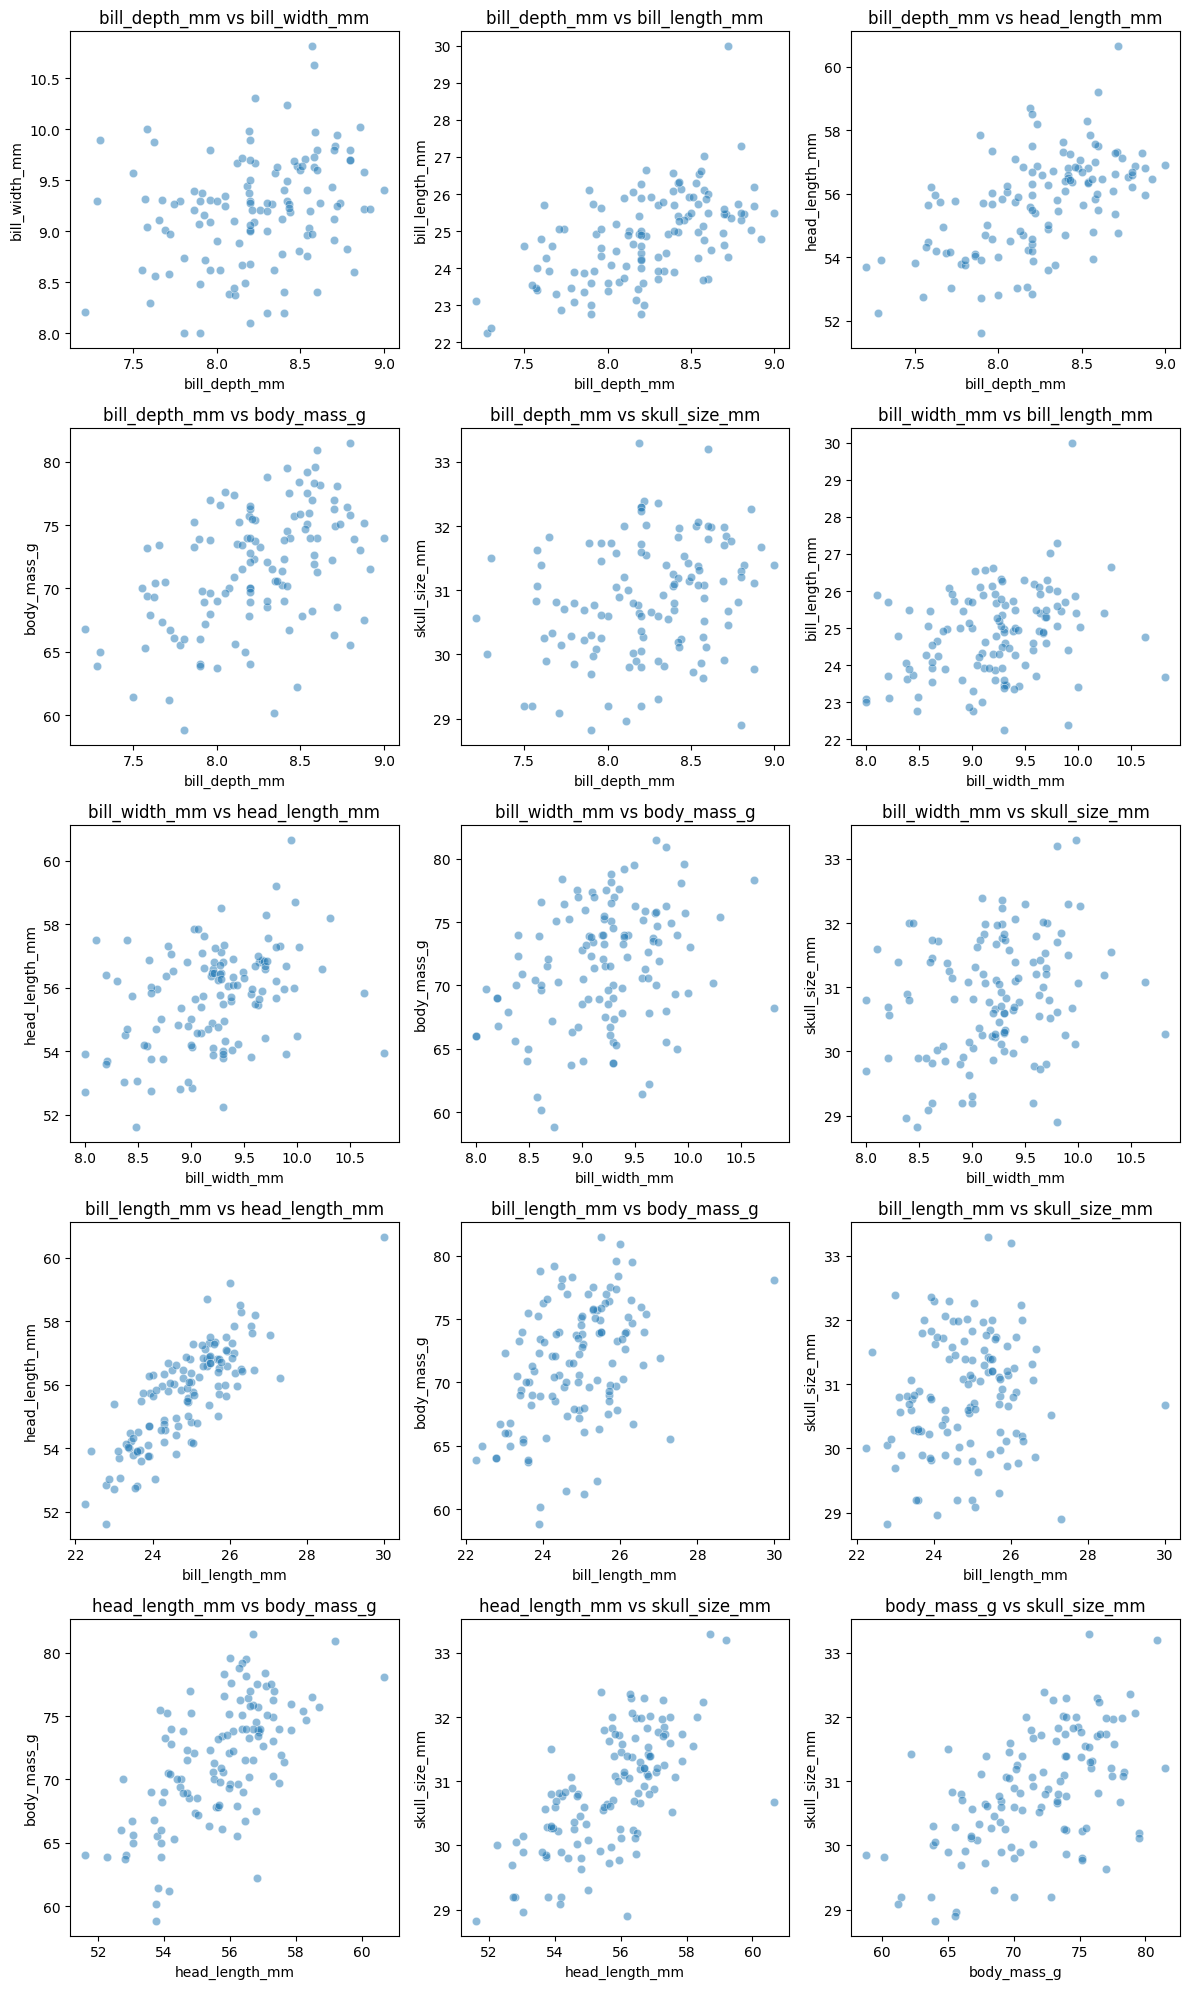

In [ ]:
#Columnas del excel
variables = ["bill_depth_mm", "bill_width_mm", "bill_length_mm", "head_length_mm", "body_mass_g", "skull_size_mm"]

pares_unicos = list(itertools.combinations(variables, 2))

# Cantidad de gráficos a dibujar
num_plots = len(pares_unicos)
cols = 3  #Variable para mostrar de manera Fija en 3 columnas
rows = (num_plots // cols) + (num_plots % cols > 0)

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 4))
axes = axes.flatten()  # Convertir en lista

# Generar los scatter plots solo en los espacios necesarios
for i, (x, y) in enumerate(pares_unicos):
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{x} vs {y}")

plt.tight_layout()
plt.show()

****

***Los graficos anteriores nos muestra la relacion entre todas las variables. Los que nos permitiera ver que tan relacionada estan entre ella, los que nos dara una idea que variable (columna) pueden ser elimina a la hora de realizar el PCA.***

**Analisis de los graficos:** La gran mayoria de estos graficos muestran una dispersión de los datos de lo que podemos observar a simple vista, aunque tambien hay algunos graficos que la dispersión no es tan alta, que se puede decir que es mediana.

Por otra parte se nota una alta correlación entre la siguiente columnas:
1. bill_length_mm vs head_length_mm
2. head_length_mm vs body_mass_g
3. head_length_mm vs skul_size_mm
4. body_mass_g vs skull_size_mm

In [ ]:
# Se crea el objeto PCA
pca = PCA()

# Ejecutar PCA con las columnas numéricas
datos_pca = pca.run(data_numeric)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


**Se realizo una grafica de calor de la matriz de covarianza, para asi tener un analisis relacion entre las variable mas facil y preciso.**

Entre mas relacion halla entre variables el numero es mayor (los valores van de 0=nada de relación y 1=relación total)

Vemos en la diagonal que es 1, lo que es totalmente normal ya que es el analisis entre ella misma, por lo que la correlación es total (1).

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]

Matriz de covarianza:
[[1.00819672 0.27233231 0.55670766 0.56227686 0.476727   0.24871341]
 [0.27233231 1.00819672 0.29890052 0.36473353 0.2921213  0.2410161 ]
 [0.55670766 0.29890052 1.00819672 0.8215004  0.41318744 0.11355263]
 [0.56227686 0.36473353 0.8215004  1.00819672 0.63460408 0.6732668 ]
 [0.476727   0.2921213  0.41318744 0.63460408 1.00819672 0.55739457]
 [0.24871341 0.2410161  0.11355263 0.6732668  0.55739457 1.00819672]]

Grafica de Matriz de covarianza:


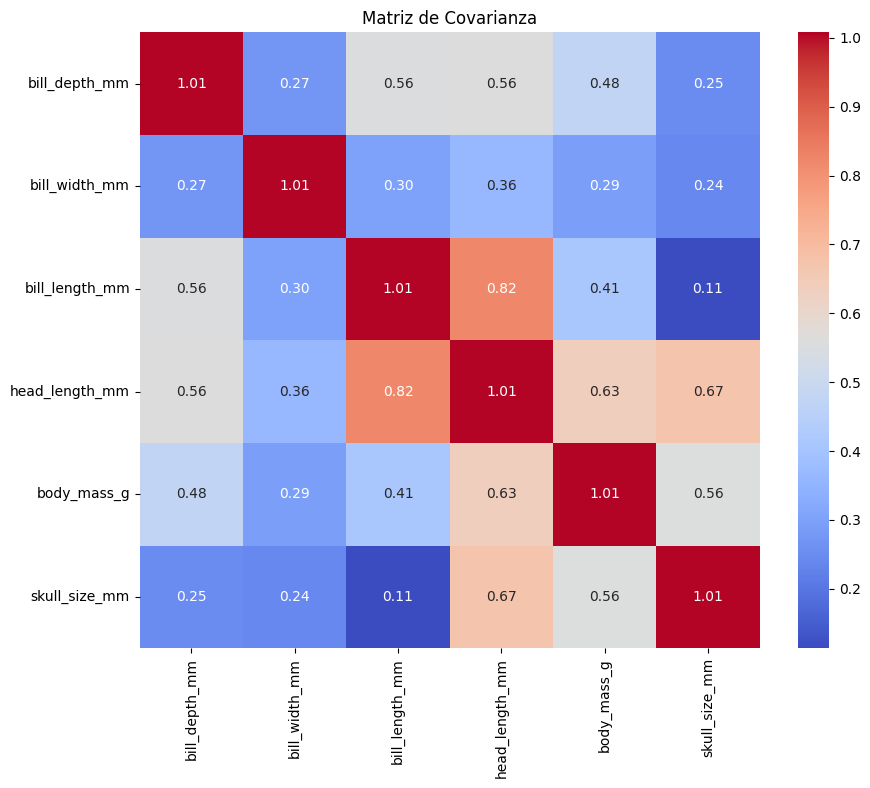


Valores propios (varianza por cada componente):
[3.27285944e+00 1.01155659e+00 8.13786358e-01 5.46814658e-01
 4.04161477e-01 1.80432307e-06]

Vectores propios (direcciones de los componentes):
[[-3.96985691e-01 -3.42262537e-01  1.52675802e-01 -7.06649851e-01
  -4.50105291e-01  1.78260034e-04]
 [-2.81040838e-01 -4.49265410e-02 -9.58222042e-01 -2.83844499e-02
   1.56950604e-03  1.74613094e-04]
 [-4.20931181e-01 -5.44180448e-01  1.36291663e-01  4.39217464e-01
   1.41941341e-01  5.43184903e-01]
 [-5.23157620e-01  7.87571214e-03  1.40753884e-01  4.04039000e-01
  -1.31442872e-01 -7.25194925e-01]
 [-4.30888022e-01  2.77787878e-01  1.25176047e-01 -3.56510477e-01
   7.70973799e-01 -2.12360773e-04]
 [-3.56197930e-01  7.12374529e-01  6.66670921e-02  1.28767608e-01
  -4.06912265e-01  4.23133991e-01]]


In [ ]:
# Ejecutar el PCA con los datos formateados numericos
datos_proyectados = pca.run(data_numeric)

# Se calcula la matriz de covarianza con la clase dada por el profesor
print("\nMatriz de covarianza:")
covmat = pca.calc_matriz_covarianza()  # Calcula la matriz de covarianza
print(covmat)

# Se grafica la matriz de covarianza para tener una visualizacion grafica de esta misma.
print("\nGrafica de Matriz de covarianza:")
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(covmat, annot=True, cmap='coolwarm', fmt='.2f', cbar=True,
            xticklabels=pca.datos_estandarizados.columns,
            yticklabels=pca.datos_estandarizados.columns)
plt.title('Matriz de Covarianza')
plt.show()

# Imprimir los valores y vectores propios
print("\nValores propios (varianza por cada componente):")
print(pca.valores_propios)

print("\nVector propios (direcciones de los componentes):")
print(pca.vectores_propios)

In [ ]:
# Calcular el porcentaje de varianza explicada por cada componente
varianza_explicada = pca.valores_propios / np.sum(pca.valores_propios) * 100
print (varianza_explicada)

# Inicializar la variables para ir sumando la varianza y los compones (columnas) necesarias
varianza_acumulada = 0
componentes_necesarios = 0

# Mostrar el porcentaje de varianza por componente con más claridad y sumar hasta el 90%
print("Porcentaje de varianza explicada por cada componente:")

for i, porcentaje in enumerate(varianza_explicada, start=1):
    varianza_acumulada += porcentaje
    print(f"Componente {i}: {porcentaje:.2f}%")

    # Si la varianza acumulada alcanza o supera el 90%, detenemos el proceso
    if varianza_acumulada >= 90:
        componentes_necesarios = i
        break

# Mostrar la cantidad de componentes necesarios para alcanzar el 90% de varianza explicada
print(f"\nSe necesitan {componentes_necesarios} componentes para alcanzar al menos el 90% de la varianza.")
print(f"y dieron {varianza_acumulada} % en total.")

[5.41041805e+01 1.67222092e+01 1.34528368e+01 9.03948351e+00
 6.68126020e+00 2.98275630e-05]
Porcentaje de varianza explicada por cada componente:
Componente 1: 54.10%
Componente 2: 16.72%
Componente 3: 13.45%
Componente 4: 9.04%

Se necesitan 4 componentes para alcanzar al menos el 90% de la varianza.
y dieron 93.31870997576308 % en total.
